# Macro Problem Set #1  (11/13/17)
## Jeffrey Sun & Rachel Anderson

### Problem 3

**1.** The maximum sustainable level of capital $\bar{k}$ is such that

\begin{align}
f(\bar{k}) + (1-\delta)\bar{k} = \bar{k} \\
\bar{k}^\alpha = \delta\bar{k} \implies \bar{k} = \delta^{\frac{1}{\alpha-1}}
\end{align}

The steady state level of capital $k^*$ is such that 

\begin{align}
\frac{1}{\beta} = \alpha k^{*\alpha-1} + 1 - \delta  \\
\implies k^* = \left( \frac{\alpha}{\beta^{-1}-1+\delta}\right)^{\frac{1}{1-\alpha}}
\end{align}


In [29]:
# Setting up environment variables

%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import pandas as pd

epsilon = 10**(-5)
beta = 0.96
alpha = 0.3
sigma = 3.0
delta = 0.08

def u(c):
    return (c**(1 - sigma))/(1 - sigma)

def f(k):
    return k**alpha

mesh = 25

In [30]:
# Setting k_bar, k_star, and the grid points as functions of environment variables

def get_k_bar():
    return delta**(1/(alpha - 1))

def get_k_star():
    return ((1/beta - (1 - delta))/alpha)**(1/(alpha - 1))

k_bar = get_k_bar()
k_star = get_k_star()

def set_mesh(N):
    global mesh, k_grid, inst_payoff
    mesh = N
    k_grid = np.linspace(0.1*k_star, k_bar, num = N)
    # Compute matrix of values of u(f(k_i) - k_j)
    k_alpha_plus_dep = (np.power(k_grid, alpha) + (1 - delta)*k_grid).reshape(mesh,1)
    # Mask out negative consumption
    neg_c_mask = np.zeros([mesh, mesh])
    neg_c_mask[np.triu_indices(mesh, k=1)] = np.nan
    W = k_alpha_plus_dep - k_grid + neg_c_mask
    inst_payoff = np.power(W, 1 - sigma)/(1 - sigma)

set_mesh(25)

/Users/rachelanderson/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in power


In [31]:
# The heavy lifting
    
def get_value_function():
    v_last = np.zeros(mesh)
    v = np.nanmax(inst_payoff + beta*v_last, 1)
    n = 0
    while (True in (abs(pair[0] - pair[1]) >= epsilon for pair in zip(v, v_last))):
        v_last = v
        v = np.nanmax(beta*v + inst_payoff, 1)
        n += 1
    return v, n

def get_value_function_howard(Nh = 10):
    v_last = np.zeros(mesh)
    v = np.nanmax(inst_payoff + beta*v_last, 1)
    policy_function_ind = np.nanargmax(beta*v + inst_payoff, 1)
    n = 0
    while (True in (abs(pair[0] - pair[1]) >= epsilon for pair in zip(v, v_last))):
        
        for h in range(Nh):
            v_tent = inst_payoff[np.arange(mesh), policy_function_ind] + beta*v[policy_function_ind]
        
        v_last = v
        v = np.nanmax(beta*v_tent + inst_payoff, 1)
        policy_function_ind = np.nanargmax(beta*v + inst_payoff, 1)
        n += 1
    return v, n

def plot_value_function():
    v = get_value_function()
    fig, axes = plt.subplots()
    axes.plot(k_grid, v[0])
    axes.set_title('Value Function')
    axes.set_xlabel('k')
    axes.set_ylabel('V(k)')
    plt.show()
    
def plot_value_function_howard():
    v = get_value_function_howard()
    fig, axes = plt.subplots()
    axes.plot(k_grid, v[0])
    axes.set_title('Value Function')
    axes.set_xlabel('k')
    axes.set_ylabel('V(k)')
    plt.show()

def get_policy_function_indices():
    v = get_value_function()[0]
    return np.nanargmax(beta*v + inst_payoff, 1)

def get_policy_function_indices_howard(Nh):
    v = get_value_function_howard(Nh)[0]
    return np.nanargmax(beta*v + inst_payoff, 1)

def get_policy_function():
    return [k_grid[ind] for ind in get_policy_function_indices()]

def get_policy_function_howard(Nh):
    return [k_grid[ind] for ind in get_policy_function_indices_howard(Nh)]

def plot_policy_function():
    policy_function = get_policy_function()
    fig, axes = plt.subplots()
    axes.plot(k_grid, policy_function)
    axes.set_title('Policy Function')
    axes.set_xlabel('k')
    axes.set_ylabel('g(k)')
    plt.show()

def get_transition_path(k_index, n):
    path = np.zeros(n)
    policy_function_indices = get_policy_function_indices()
    for i in range(n):
        path[i] = k_grid[k_index]
        k_index = policy_function_indices[k_index]
    return path

def plot_transition_paths(k_index1 = 1, k_index2 = 5, dur = 25):
    fig, axes = plt.subplots()
    axes.plot(np.arange(dur), get_transition_path(k_index1, dur))
    axes.plot(np.arange(dur), get_transition_path(k_index2, dur))
    axes.set_title('Transition Paths')
    axes.set_xlabel('t')
    axes.set_ylabel('$k_t$')
    plt.show()
    
def plot_many_value_functions():
    fig, axes = plt.subplots()
    axes.set_title('Value Functions')
    axes.set_xlabel('k')
    axes.set_ylabel('V(k)')
    for m in [25, 50, 100, 200, 400, 800]:
        set_mesh(m)
        axes.plot(k_grid, get_value_function()[0], label = "N = {0}".format(mesh))
    plt.legend(loc=4)
    plt.show()
    
def plot_many_value_functions_howard():
    set_mesh(800)
    fig, axes = plt.subplots()
    axes.set_title('Value Functions')
    axes.set_xlabel('k')
    axes.set_ylabel('V(k)')
    for Nh in [1, 10, 50, 100, 250, 500]:
        axes.plot(k_grid, get_value_function_howard(Nh)[0], label = "Nh = {0}".format(Nh))
    axes.plot(k_grid, get_value_function()[0], label = "Not Howard")
    plt.legend(loc=4)
    plt.show()

def plot_many_policy_functions_howard():
    set_mesh(800)
    fig, axes = plt.subplots()
    axes.set_title('Policy Functions')
    axes.set_xlabel('k')
    axes.set_ylabel('g(k)')
    for Nh in [1, 10, 50, 100, 250, 500]:
        axes.plot(k_grid, get_policy_function_howard(Nh), label = "Nh = {0}".format(Nh))
    axes.plot(k_grid, get_policy_function(), label = "Not Howard")
    plt.legend(loc=4)
    plt.show()

def times_to_converge():
    meshes = [25, 50, 100, 200, 400, 800]
    times = np.empty_like(meshes, dtype=float)
    num_iterations = np.empty_like(times)
    for i in range(len(meshes)):
        start = time.time()
        set_mesh(meshes[i])
        num_iterations[i] = get_value_function()[1]
        end = time.time()
        times[i] = end - start
    return meshes, num_iterations, times

def times_to_converge_howard():
    set_mesh(800)
    Nhs = [1, 10, 50, 100, 250, 500]
    times = np.empty_like(Nhs, dtype=float)
    num_iterations = np.empty_like(times)
    for i in range(len(Nhs)):
        start = time.time()
        num_iterations[i] = get_value_function_howard(Nhs[i])[1]
        end = time.time()
        times[i] = end - start
    return Nhs, num_iterations, times

def times_to_converge_df():
    meshes, num_iterations, times = times_to_converge()
    times = times.tolist()
    num_iterations = num_iterations.tolist()
    df = pd.DataFrame([meshes, num_iterations, times], ["N", "Iterations", "Time (s)"])
    return df

def times_to_converge_howard_df():
    Nhs, num_iterations, times = times_to_converge_howard()
    times = times.tolist()
    num_iterations = num_iterations.tolist()
    df = pd.DataFrame([Nhs, num_iterations, times], ["Nh", "Iterations", "Time (s)"])
    return df

In [32]:
print("k_bar: ", k_bar, "\nk_star:", k_star)

k_bar:  36.898975173437286 
k_star: 3.63017920169682


/Users/rachelanderson/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in power


<IPython.core.display.Javascript object>


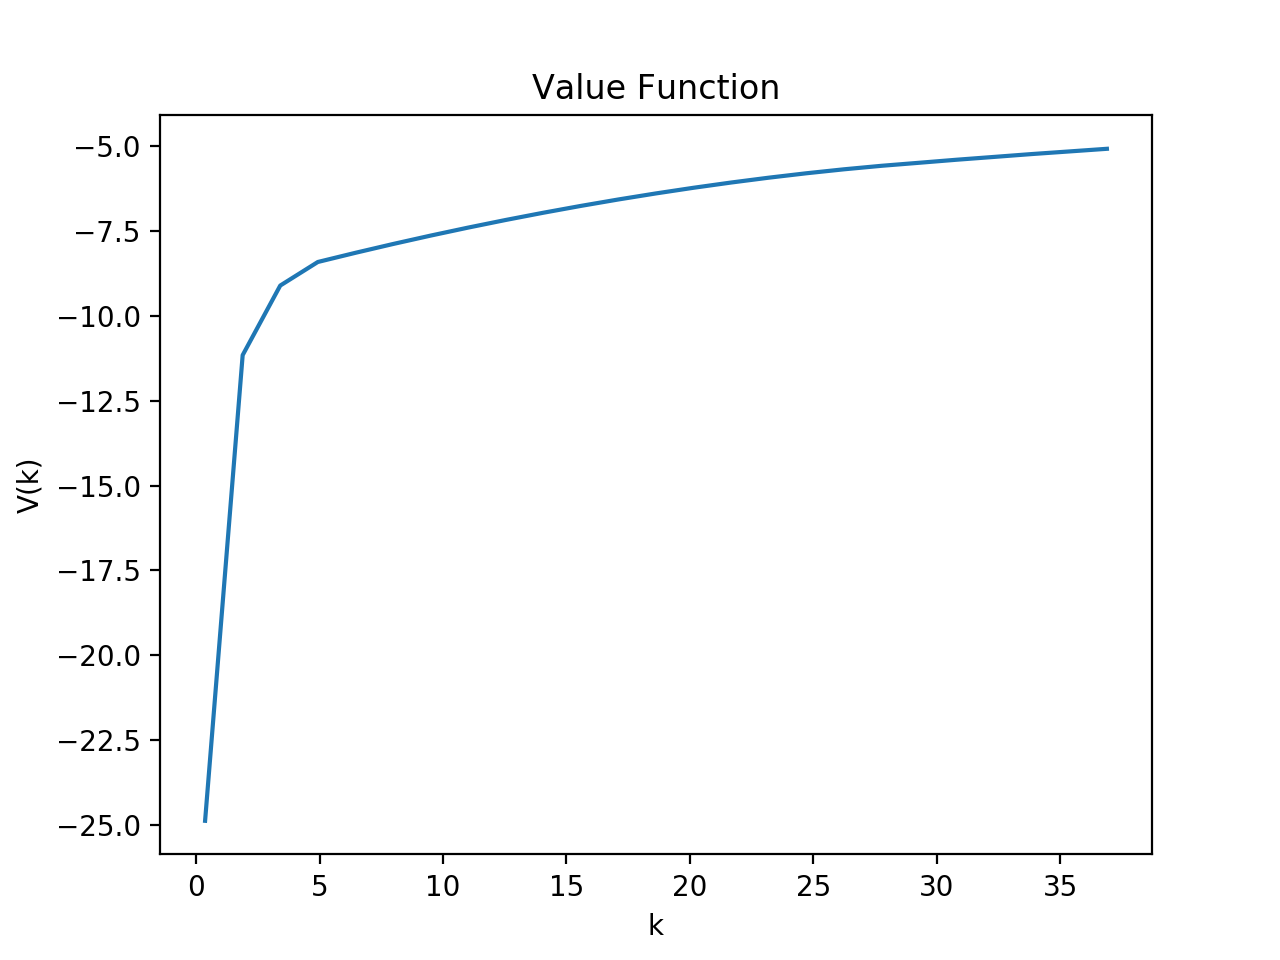

<IPython.core.display.Javascript object>


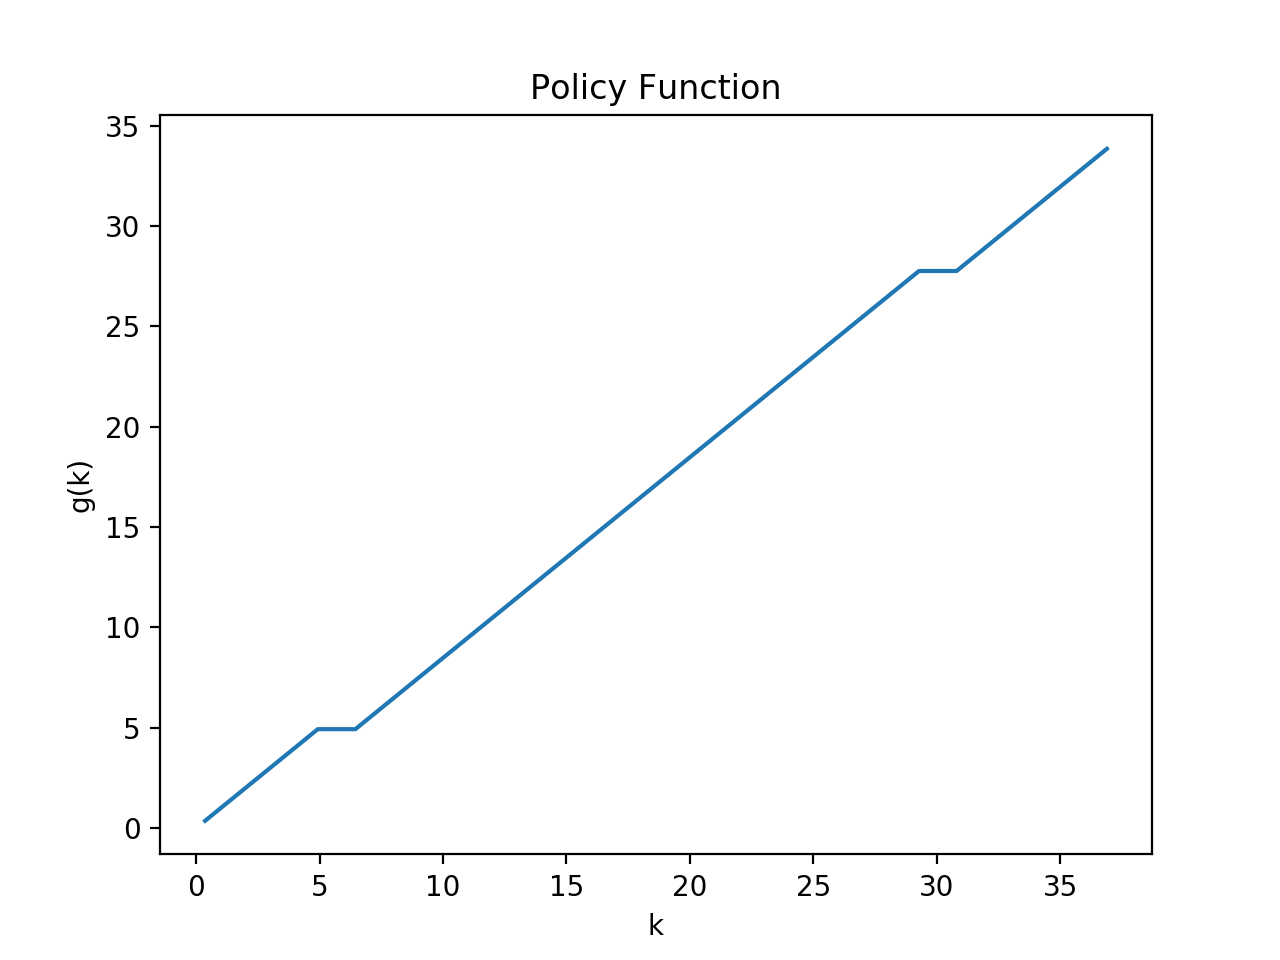

In [33]:
set_mesh(25)
plot_value_function()
plot_policy_function()

# The value function is increasing, and apparently concave. It is very low for low level of initial capital,
# reflecting the lost consumption over the next few periods, as the consumer must "tighten their belt" while
# accumulating capital to reach steady state. For higher levels of capital, the marginal value of additional
# capital falls quite quickly, as it reflects only the prospect of short-lived additional consumption.

# The policy function is also apparently concave, although due to the coarseness of the grid, is actually
# approximated as the identity for k <= 5. It is much less concave, reflecting gradual optimal capital change.

/Users/rachelanderson/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in power


<IPython.core.display.Javascript object>


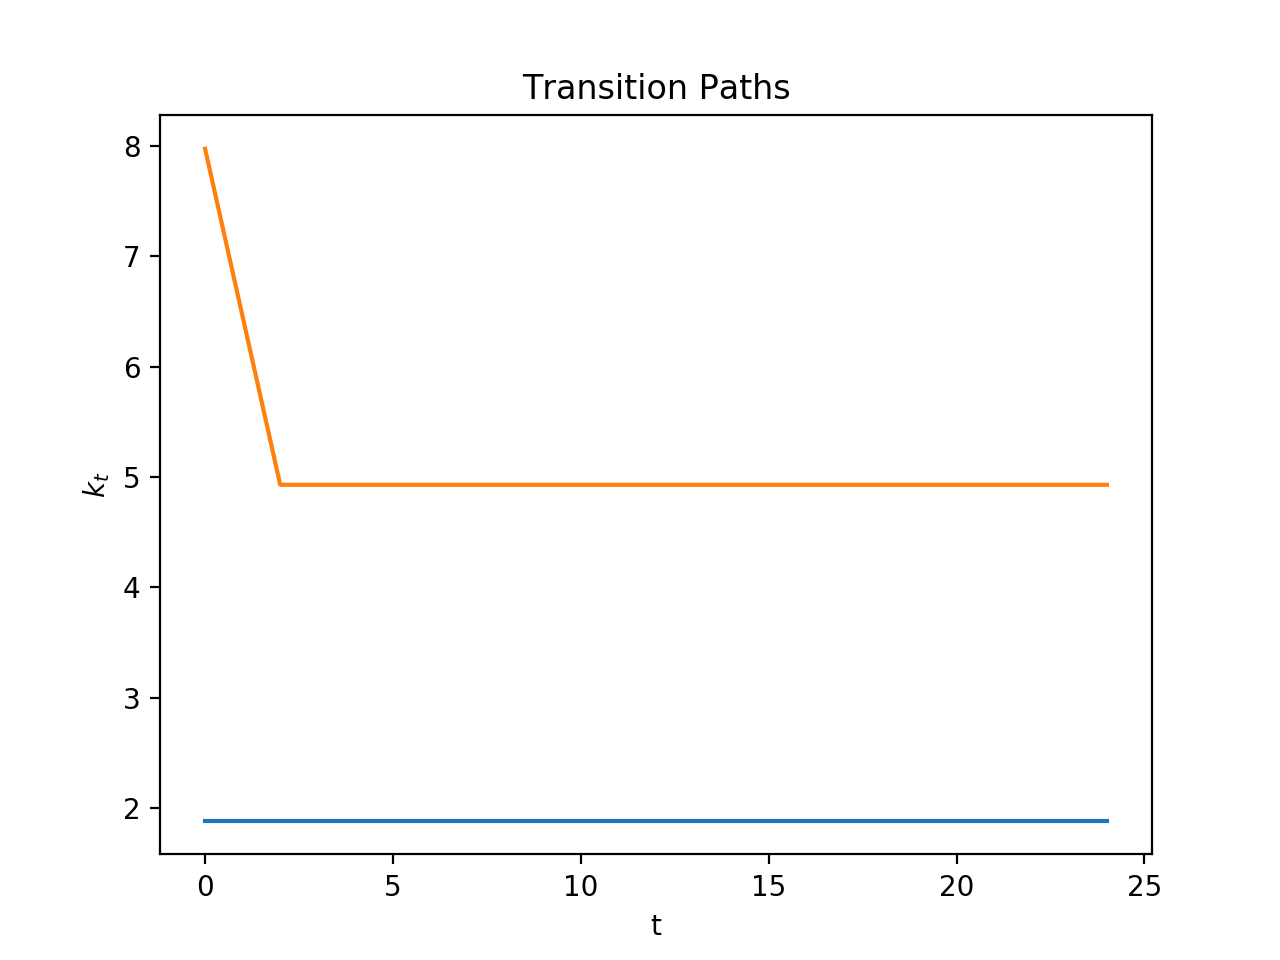

In [34]:
set_mesh(25)
plot_transition_paths()

# The path starting from below k_star does not converge to the steady-state. This is due to the coarseness
# of the approximation.

<IPython.core.display.Javascript object>


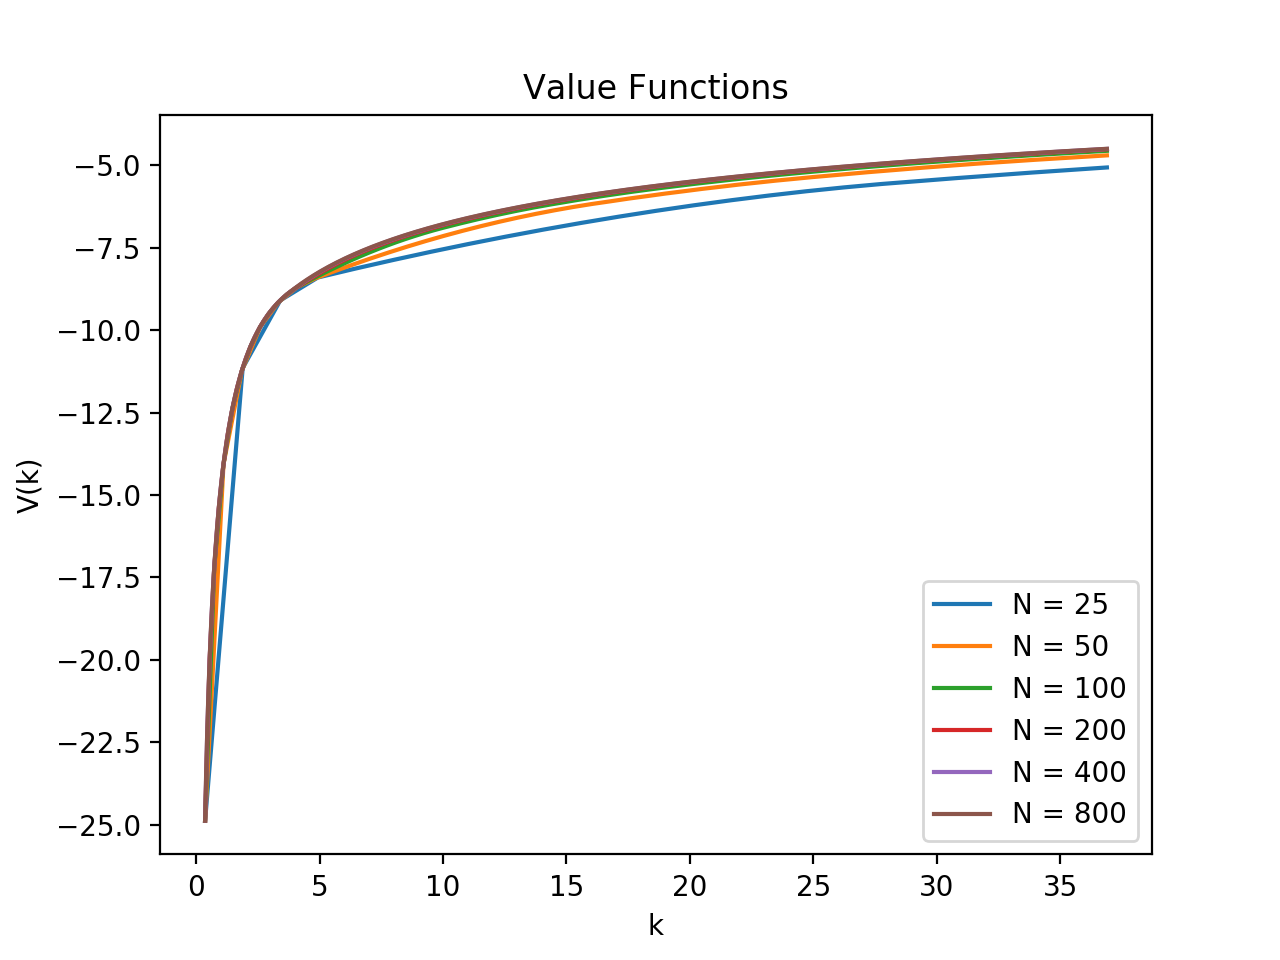

/Users/rachelanderson/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in power


In [35]:
plot_many_value_functions()

# Doubling the number of grid points has diminishing marginal returns. Even initially, it does not increase
# accuracy that much.

In [36]:
times_to_converge_df()

/Users/rachelanderson/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in power


,0,1,2,3,4,5
N,25.000000,50.000000,100.00000,200.000000,400.00000,800.000000
Iterations,282.000000,282.000000,282.00000,282.000000,282.00000,282.000000
Time (s),0.007142,0.005841,0.01004,0.026473,0.14332,0.602319


/Users/rachelanderson/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in power


<IPython.core.display.Javascript object>


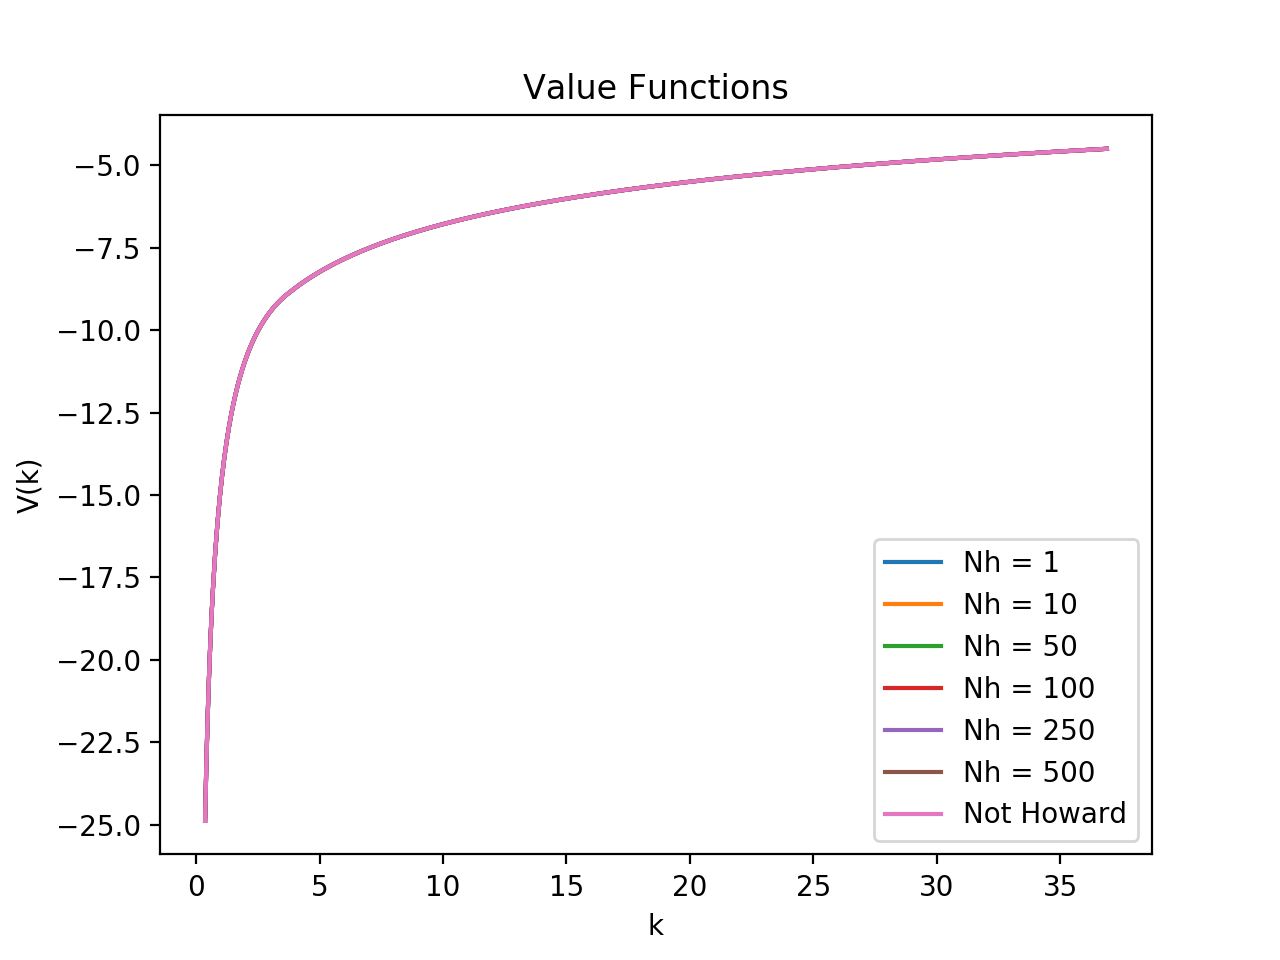

In [37]:
plot_many_value_functions_howard()

# As Nh increases, the loss of accuracy is barely noticeable

/Users/rachelanderson/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in power


<IPython.core.display.Javascript object>


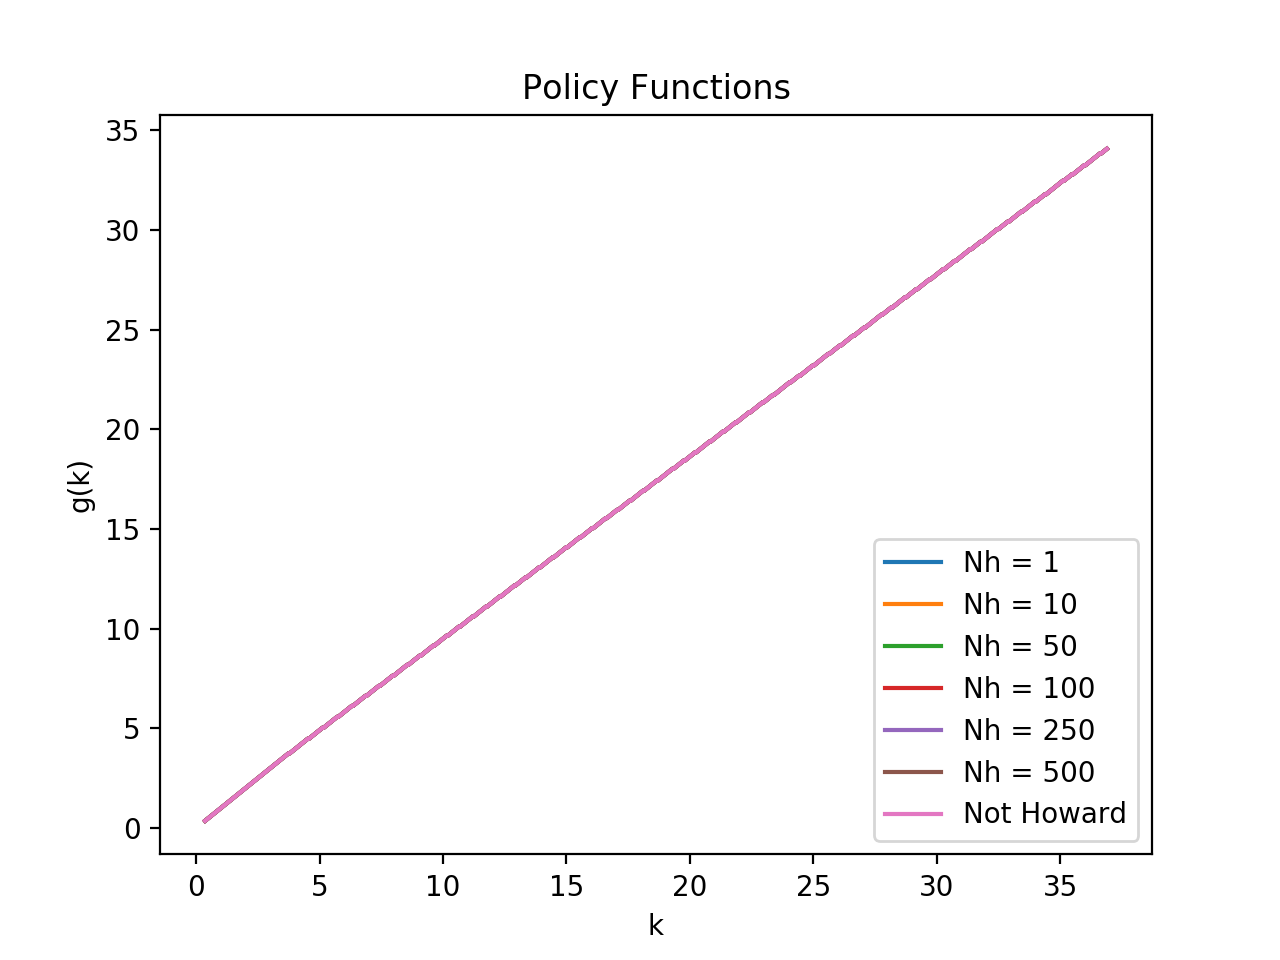

In [38]:
plot_many_policy_functions_howard()

In [39]:
times_to_converge_howard_df()

# Technically, increasing Nh makes the computation slower, but this is only because of how fast 
#numpy is at the original algorithm after being optimized correctly. It should be that increasing Nh 
#makes the computation faster.

/Users/rachelanderson/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in power


,0,1,2,3,4,5
Nh,1.000000,10.000000,50.000000,100.000000,250.000000,500.000000
Iterations,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
Time (s),0.911532,0.920763,0.995012,1.159044,1.450201,2.002461
